# Test Smooth
Histogram smoothing.




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:58 AM.</small></i>

In [1]:
int ipad = 1;
TCanvas * c1 = 0;

 A helper function is created: 

In [2]:
%%cpp -d
void smooth_hist(const char * fname, double xmin, double xmax, int n1, int n2) {

   std::cout << "smoothing a " << fname << " histogram" << std::endl;

   TH1D * h1 = new TH1D("h1","h1",100,xmin,xmax);
   TH1D * h2 = new TH1D("h2","h2",100,xmin,xmax);
   h1->FillRandom(fname,n1);

   TH1D * h1_s = new TH1D(*h1);
   h1_s->SetName("h1_s");
   h1_s->Smooth();

   h2->FillRandom(fname,n2);

   double p1 = h1->Chi2Test(h2,"");
   double p2 = h1_s->Chi2Test(h2,"UU");
   if (p2 < p1) Error("testSmooth","TH1::Smooth is not working correctly - a worst chi2 is obtained");

   std::cout << " chi2 test non-smoothed histo " << p1 <<  std::endl;
   std::cout << " chi2 test smoothed histo     " << p2 <<  std::endl;

   double a1 = h1->AndersonDarlingTest(h2);
   double a2 = h1_s->AndersonDarlingTest(h2);

   std::cout << " AD test non-smoothed histo " << a1 <<  std::endl;
   std::cout << " AD test smoothed histo     " << a2 <<  std::endl;

   double k1 = h1->KolmogorovTest(h2);
   double k2 = h1_s->KolmogorovTest(h2);

   std::cout << " KS test non-smoothed histo " << k1 <<  std::endl;
   std::cout << " KS test smoothed histo     " << k2 <<  std::endl;

   c1->cd(ipad++);
   h1->Draw("E");
   h1_s->SetLineColor(kRed);
   h1_s->Draw("same");
   h2->Scale(double(n1)/n2);
   h2->SetLineColor(kGreen);
   h2->Draw("same");
}

 Arguments are defined. 

In [3]:
int n1 = 1000;
int n2 = 1000000;

In [4]:
TH1::AddDirectory(false);

c1  = new TCanvas();
c1->Divide(1,3);


smooth_hist("gaus",-5,5,n1,n2);
smooth_hist("landau",-5,15,n1,n2);
smooth_hist("expo",-5,0,n1,n2);

smoothing a gaus histogram
 chi2 test non-smoothed histo 5.15629e-11
 chi2 test smoothed histo     1
 AD test non-smoothed histo 0.70651
 AD test smoothed histo     0.488314
 KS test non-smoothed histo 0.933145
 KS test smoothed histo     0.770148
smoothing a landau histogram


Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 1 event.

Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 1 event.



 chi2 test non-smoothed histo 0.966464
 chi2 test smoothed histo     1
 AD test non-smoothed histo 0.553608
 AD test smoothed histo     0.318308
 KS test non-smoothed histo 0.7146
 KS test smoothed histo     0.764859
smoothing a expo histogram


Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 1 event.

Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 1 event.



 chi2 test non-smoothed histo 0.364215
 chi2 test smoothed histo     0.999855
 AD test non-smoothed histo 0.870351
 AD test smoothed histo     0.623785
 KS test non-smoothed histo 0.966402
 KS test smoothed histo     0.799221


Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 1 event.

Info in <TH1D::Chi2TestX>: There is a bin in h1 with less than 1 event.



Draw all canvases 

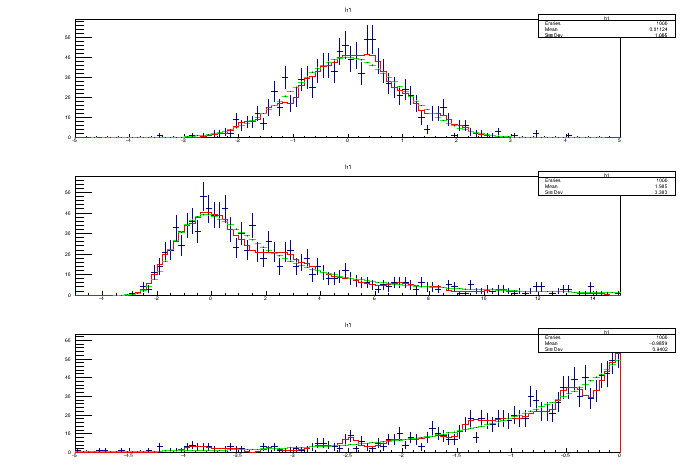

In [5]:
gROOT->GetListOfCanvases()->Draw()